In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
!ls -ltr

total 55960
-rw-r--r--@ 1 joydeepbhattacharjee  staff  17333449 Dec 15 20:54 train.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff    975309 Dec 15 20:54 test.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff    393899 Dec 15 20:54 sample_submission.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff   3454726 Dec 25 08:48 demand-forecasting-kernels-only.zip
-rw-r--r--  1 joydeepbhattacharjee  staff   4077500 Dec 25 11:38 time series analysis.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff     16226 Dec 28 22:23 time series metrics.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff       519 Jan  4 08:48 shampoo.csv
-rw-r--r--  1 joydeepbhattacharjee  staff    492527 Jan  5 08:53 time series analysis shampoo dataset.ipynb
-rw-r--r--@ 1 joydeepbhattacharjee  staff      1200 Jan 13 20:27 LYNXdata.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff     27912 Jan 13 20:34 Time Series Analysis and Forecasting in Python - Course Script.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff    377749 Jan 15 10:37 python

In [3]:
!head us-infl.csv

In [22]:
inflation_rates = "inflation_rates"
us_inflation = pd.read_csv(
    "us-infl.csv", header=0,
    names=["months", "inflation_rates"])
us_inflation_df["months"] = pd.date_range(start='1/1/2003', end='12/1/2017', freq='MS')
us_inflation_df = us_inflation_df.set_index("months")

In [37]:
us_inflation_df = us_inflation_df[inflation_rates]

In [38]:
us_inflation_df

months
2003-01-01    0.44
2003-02-01    0.77
2003-03-01    0.60
2003-04-01   -0.22
2003-05-01   -0.16
              ... 
2017-08-01    0.30
2017-09-01    0.53
2017-10-01   -0.06
2017-11-01    0.00
2017-12-01   -0.06
Name: inflation_rates, Length: 180, dtype: float64

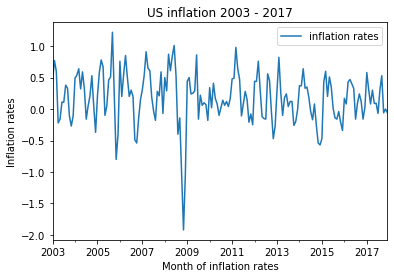

In [24]:
us_inflation_df.plot()
plt.title("US inflation 2003 - 2017")
plt.xlabel('Month of inflation rates')
plt.ylabel('Inflation rates')
plt.legend(['inflation rates'])

In [41]:
def stationarity_test(timeseries):
    """Augmented dicky fuller test for stationarity"""
    print("Results of dicky fuller tests")
    df_test = adfuller(timeseries, autolag="AIC")
    df_output = pd.Series(df_test[0:4], index=["Test Statistic", "p-value", "#Lags used", "Number of observations used"])
    print(df_output)

In [43]:
stationarity_test(us_inflation_df)

Results of dicky fuller tests
Test Statistic                -8.599116e+00
p-value                        6.946317e-14
#Lags used                     1.000000e+00
Number of observations used    1.780000e+02
dtype: float64


In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

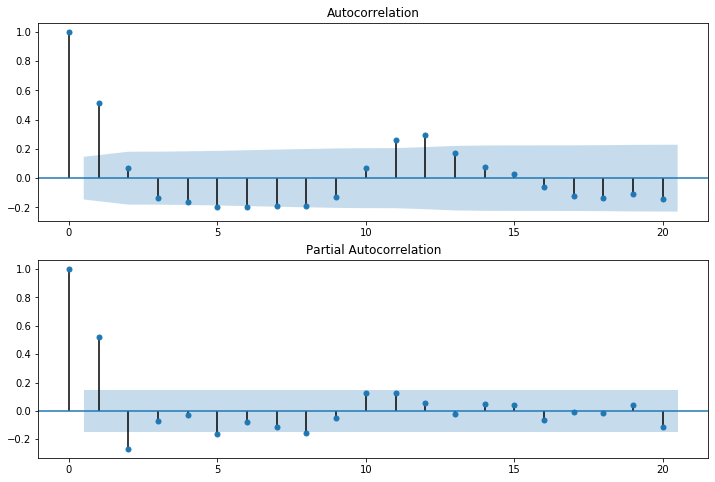

In [45]:
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(us_inflation_df, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(us_inflation_df, lags=20, ax=ax2)

In [46]:
cumsum_us_inflation = np.cumsum(us_inflation_df)

In [47]:
cumsum_us_inflation.head()

months
2003-01-01    0.44
2003-02-01    1.21
2003-03-01    1.81
2003-04-01    1.59
2003-05-01    1.43
Name: inflation_rates, dtype: float64

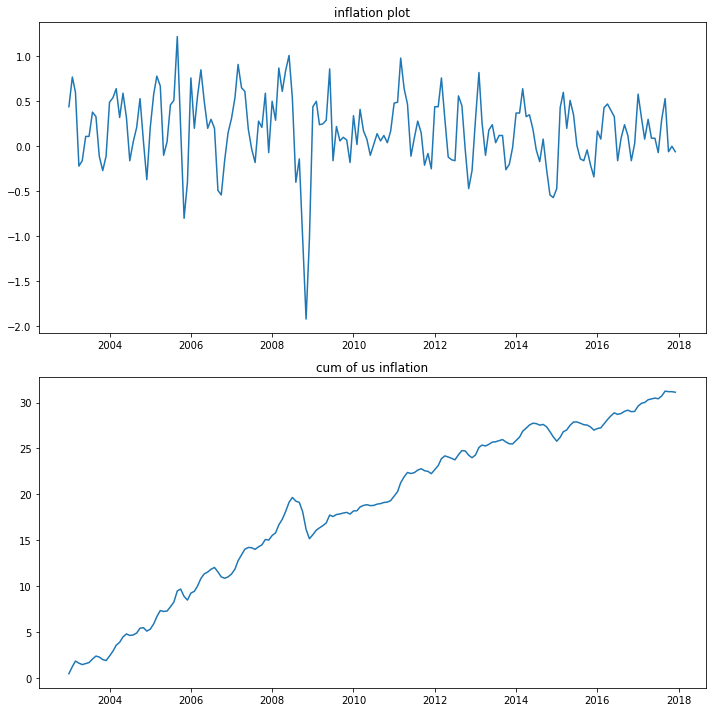

In [48]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2,1,1)
plt.plot(us_inflation_df)
plt.title("inflation plot")

ax1 = plt.subplot(2,1,2)
plt.plot(cumsum_us_inflation)
plt.title("cum of us inflation")
plt.tight_layout()

In [49]:
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods=1).mean()
    rol_std = timeseries.rolling(window, min_periods=1).std()
    
    fig = plt.figure(figsize=(12, 8))
    og = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rol_mean, color='red', label='rolling mean')
    std = plt.plot(rol_std, color='black', label='rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation (window = ' + str(window) + ')')

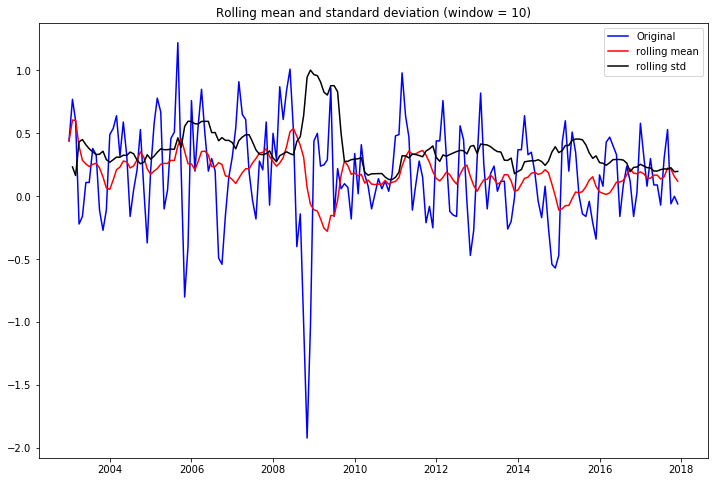

In [50]:
plot_rolling(us_inflation_df, 10)

In [51]:
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()
    
    fig = plt.figure(figsize=(12, 8))
    og = plt.plot(timeseries, color='blue', label='Original')
    exwm = plt.plot(expw_ma, color='red', label='EWMA')
    plt.legend(loc='best')
    plt.title('EWMA (alpha = ' + str(alpha) + ')')
    plt.show()

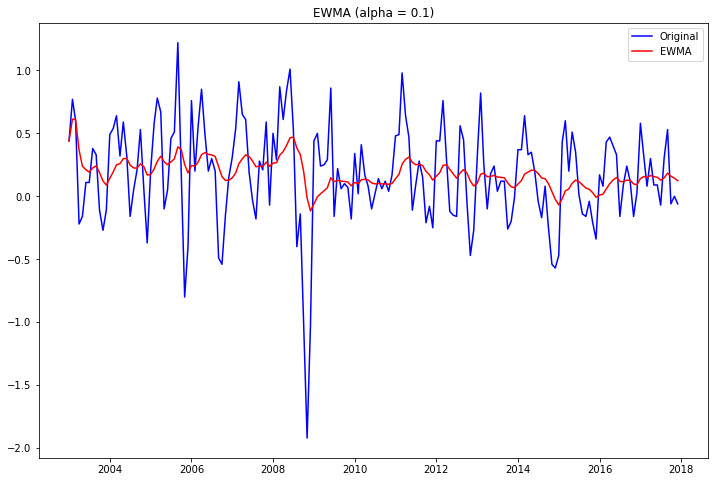

In [53]:
plot_ewma(us_inflation_df, 0.1)